<a href="https://colab.research.google.com/github/LeisaSousa/Teste/blob/main/Desafio_individual_teste_hipoteses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Bootcamp Data Analytics | Squad Grace Hooper DAT7**

##### **Líder:** Maria Isabelle Mosca de Araújo

1. Andreia de Souza Melo Paschoarelli
2. Amanda Cruz de Araújo
3. Alexsandra Tavares S. da Silva
4. Hosana Fernandes Gomes
5. Isabela de Souza Silva
6. Leísa Nascimento de Souza
7. Luana Verçosa
8. Michele Farias das Virgens
9. Neucielle Quadros Nunes

# Importanto as Bibliotecas, Dataframe | Processamento dos dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind

In [ ]:
df = pd.read_csv('/content/desafio_01_cosmeticos_challenge_testehipoteses230206120450-230911-094933.csv')
df.head(11)

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
0,1,1,12,40,1
1,2,2,5,36,0
2,1,3,19,47,0
3,1,4,14,36,1
4,1,5,17,46,1
5,1,6,14,56,1
6,1,7,12,29,1
7,1,8,13,52,1
8,1,9,18,27,0
9,2,10,7,19,1


In [ ]:
df.columns

Index(['id_produto', 'id_voluntária', 'durabilidade', 'idade',
       'exposicao_sol'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id_produto     300 non-null    int64
 1   id_voluntária  300 non-null    int64
 2   durabilidade   300 non-null    int64
 3   idade          300 non-null    int64
 4   exposicao_sol  300 non-null    int64
dtypes: int64(5)
memory usage: 11.8 KB


In [ ]:
df.describe()

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2.000000,150.500000,17.133333,36.886667,0.440000
std,0.817861,86.746758,10.942945,12.625841,0.497216
min,1.000000,1.000000,5.000000,18.000000,0.000000
25%,1.000000,75.750000,9.000000,26.000000,0.000000
50%,2.000000,150.500000,14.000000,36.000000,0.000000
75%,3.000000,225.250000,20.000000,48.000000,1.000000
max,3.000000,300.000000,48.000000,60.000000,1.000000


# DESAFIO 1 _ Cosmetícos

Suponha que você trabalha em uma empresa do ramo de cosméticos ou beleza. O
Time de produtos dessa empresa está interessado criar novos batons com maior
durabilidade. Para isso estão testando 3 diferentes fórmulas para irem a mercado.

Com isso, a empresa fez uma pesquisa com varias voluntárias e populou a base de
dados (desafio_01_cosmeticos.csv) contendo as seguintes informacoes:

● id_produto: código identificador do produto, com a fórmula utilizada. Para
diferenciarmos se se trata do batom com a fórmula 1, 2 ou 3

● id_voluntária: código identificador da voluntária que utilizou o produto.

● durabilidade: quanto tempo o produto durou em horas.

● idade: idade da voluntária

● exposicao_sol: variável que indica 1 se a voluntária se expos ao sol 0 caso
contrário.

 1- Existe diferenca estatisticamente significativa na durabilidade dos batons com formulas diferentes?


In [ ]:
# Separando os dados de durabilidade por fórmula

formula_1 = df[df['id_produto'] == 1]['durabilidade']
formula_2 = df[df['id_produto'] == 2]['durabilidade']
formula_3 = df[df['id_produto'] == 3]['durabilidade']

# Realizar o teste ANOVA
f_statistic, p_value = stats.f_oneway(formula_1, formula_2, formula_3)

# Exibir os resultados
print(f'Estatística F: {f_statistic}')
print(f'Valor-p: {p_value}')

# Verificar significância
if p_value < 0.05:
    print("Existe uma diferença estatisticamente significativa na durabilidade entre as fórmulas.")
else:
    print("Não existe uma diferença estatisticamente significativa na durabilidade entre as fórmulas.")


Estatística F: 240.6680561187368
Valor-p: 7.345246616757137e-63
Existe uma diferença estatisticamente significativa na durabilidade entre as fórmulas.


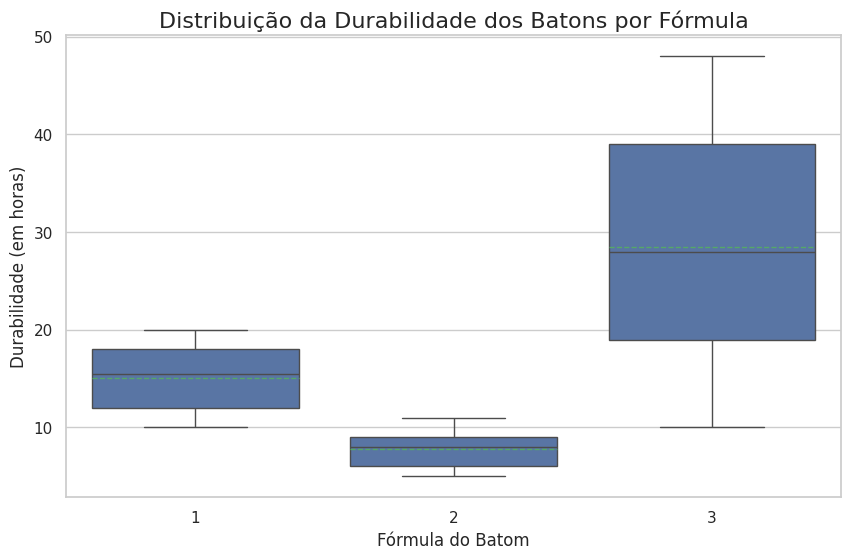

In [ ]:
# Configurar o estilo e o tamanho do gráfico
sns.set(style="whitegrid")

# Criando o gráfico boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='id_produto', y='durabilidade', data=df, showmeans=True, meanline=True)

# Adicionando título e rótulos
plt.title('Distribuição da Durabilidade dos Batons por Fórmula', fontsize=16)
plt.xlabel('Fórmula do Batom', fontsize=12)
plt.ylabel('Durabilidade (em horas)', fontsize=12)

# Adicionando a média de cada fórmula no gráfico
for i, box in enumerate(ax.artists):
    medians = df.groupby('id_produto')['durabilidade'].median()
    ax.text(i, medians[i] + 0.05, round(medians[i], 2),
            horizontalalignment='center', size='medium', color='black', weight='semibold')

# Exibindo o gráfico
plt.show()


Análise das Caixas
Caixa 1 (Fórmula 1)
Mínimo: 10 horas
Q1: 12 horas (25% dos dados estão abaixo desse valor)
Q2 (Mediana): 16 horas (50% dos dados estão abaixo desse valor)
Q3: 18 horas (75% dos dados estão abaixo desse valor)
Máximo: 20 horas
Interpretação:

A durabilidade dos batons da Fórmula 1 varia entre 10 e 20 horas.
A mediana (16 horas) indica que metade das voluntárias relatou durabilidades até esse tempo, e a maior parte dos dados (até Q3, que é 18 horas) está abaixo de 18 horas.
A menor durabilidade é 10 horas, e há uma concentração de dados próximos à mediana.
Caixa 2 (Fórmula 2)
Mínimo: 3 horas
Q1: 5 horas
Q2 (Mediana): 8 horas
Q3: 8 horas
Máximo: 12 horas
Interpretação:

A durabilidade dos batons da Fórmula 2 é muito menor, variando entre 3 e 12 horas.
A mediana é de apenas 8 horas, indicando que a maioria das voluntárias teve experiências de durabilidade abaixo desse tempo.
A presença de um mínimo tão baixo (3 horas) sugere que alguns batons dessa fórmula têm durabilidades consideravelmente insatisfatórias.
Caixa 3 (Fórmula 3)
Mínimo: 10 horas
Q1: 18 horas
Q2 (Mediana): 28 horas
Q3: 38 horas
Máximo: 48 horas
Interpretação:

A durabilidade dos batons da Fórmula 3 é significativamente maior, variando entre 10 e 48 horas.
A mediana é de 28 horas, indicando que metade das voluntárias relatou durabilidades acima desse valor, e a maioria (75%, até Q3) teve durabilidade acima de 38 horas.
A diferença em relação às outras fórmulas é notável, pois essa fórmula não só tem a mediana mais alta, mas também um máximo que é consideravelmente maior (48 horas).
Comparação entre as Fórmulas
Fórmula 1 apresenta durabilidades medianas razoáveis, mas ainda longe do ideal.
Fórmula 2 parece ter desempenho insatisfatório em relação à durabilidade.
Fórmula 3 se destaca como a mais eficaz, com medianas e máximas significativamente mais altas.

2- Essa diferenca persiste ou nao quando a voluntária se expoe ao sol? E com relacao a idade?

In [ ]:
# Dividindo os dados em dois grupos com base na exposição ao sol
grupo_exposto = df[df['exposicao_sol'] == 1]['durabilidade']
grupo_nao_exposto = df[df['exposicao_sol'] == 0]['durabilidade']

# Realizando o teste t
t_stat, p_valor = stats.ttest_ind(grupo_exposto, grupo_nao_exposto)

# Exibindo os resultados
print(f'Estatística t: {t_stat}')
print(f'Valor p: {p_valor}')

# Interpretação
alpha = 0.05
if p_valor < alpha:
    print("Há uma diferença estatisticamente significativa na durabilidade dos batons entre os grupos.")
else:
    print("Não há diferença estatisticamente significativa na durabilidade dos batons entre os grupos.")


Estatística t: -6.569037741942654
Valor p: 2.2536816589784333e-10
Há uma diferença estatisticamente significativa na durabilidade dos batons entre os grupos.


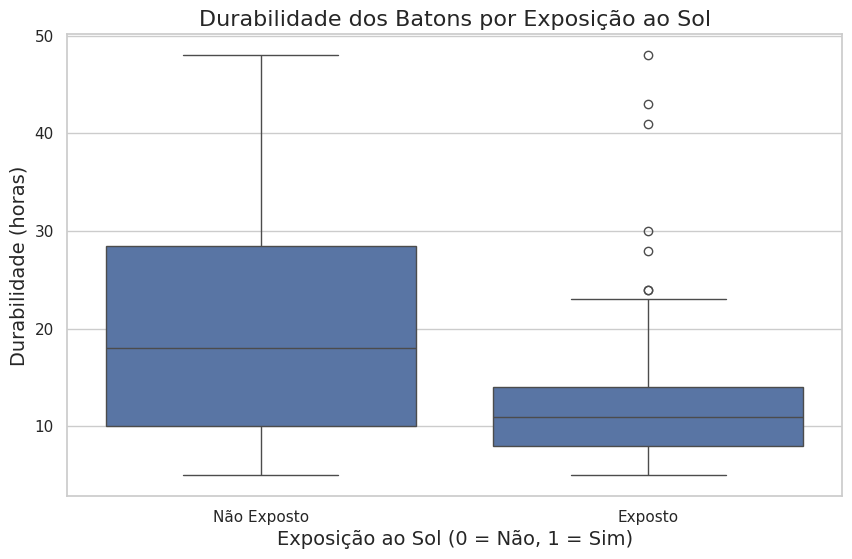

In [ ]:
# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Criando o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='exposicao_sol', y='durabilidade', data=df)

# Adicionando títulos e rótulos
plt.title('Durabilidade dos Batons por Exposição ao Sol', fontsize=16)
plt.xlabel('Exposição ao Sol (0 = Não, 1 = Sim)', fontsize=14)
plt.ylabel('Durabilidade (horas)', fontsize=14)

# Exibindo o gráfico
plt.xticks([0, 1], ['Não Exposto', 'Exposto'])
plt.show()

In [ ]:
# Usando ANOVA para verificar se a idade influencia a durabilidade

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Criando uma variável categórica para idades
df['grupo_idade'] = pd.cut(df['idade'], bins=[0, 18, 30, 45, 60, 100],
                             labels=['0-18', '19-30', '31-45', '46-60', '60+'])

# Realizando ANOVA
modelo = ols('durabilidade ~ grupo_idade', data=df).fit()
anova_table = sm.stats.anova_lm(modelo, typ=2)

# Exibindo a tabela ANOVA
print(anova_table)


                   sum_sq     df          F        PR(>F)
grupo_idade   9674.274895    4.0  25.076091  1.745732e-14
Residual     28548.960496  296.0        NaN           NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '


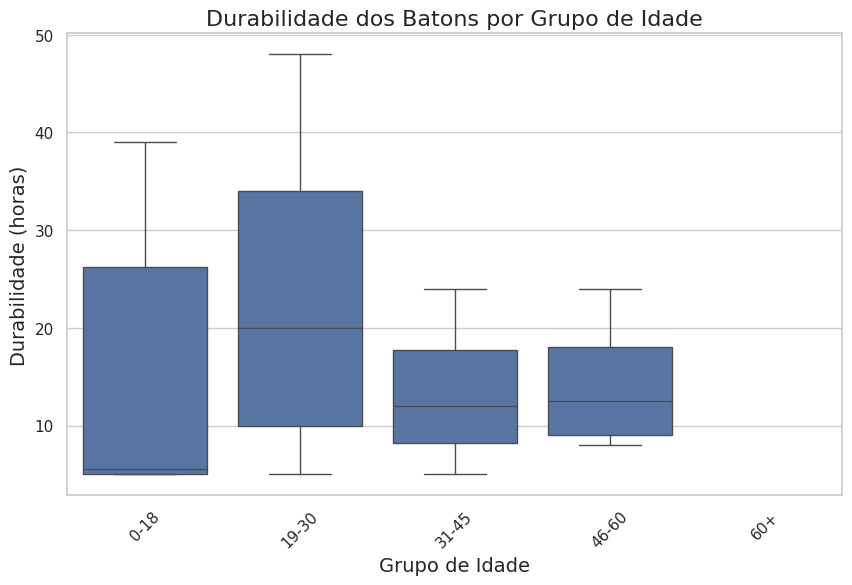

In [ ]:
# Criando o boxplot para visualização
plt.figure(figsize=(10, 6))
sns.boxplot(x='grupo_idade', y='durabilidade', data=df)

# Adicionando títulos e rótulos
plt.title('Durabilidade dos Batons por Grupo de Idade', fontsize=16)
plt.xlabel('Grupo de Idade', fontsize=14)
plt.ylabel('Durabilidade (horas)', fontsize=14)

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.show()


3- Qual fórmula de batom voce indicaria para consumidores que buscam maior durabilidade e exposicao ao sol?

In [ ]:
###A Fórmula 3 apresenta a maior mediana de durabilidade (28 horas) e um máximo de até 48 horas.
###Isso sugere que, em média, os consumidores podem esperar que o batom dure significativamente mais do que as outras fórmulas.


# **Desafio 2:**

Imagine que voce trabalha em uma empresa do setor alimentício, e o preço de
determinado produto, um novo picolé, tem uma distribuição normal com média igual a R$7,85 e desvio padrão igual a R$3,32. Suspeita-se que devido ao verão, em determinadas localidades de praia o preco do picolé esteja mais caro.

Para verificar se esse efeito é estatisticamente significativo, contactaram voce, analista de dados.

Suponha que para realizar essa análise voce tenha dados de 45 lojas em cidades do litoral, escolhidas aleatoriamente. E constatou que o preço médio do picolé nessas cidades é de R$11,52.

1- Voce pode concluir que existe diferenca de precos estatisticamente relevante com 5% de significancia?

2- Qual o valor da variável teste, o intervalo de confianca e o p-valor?